In [187]:
# Dependencies
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
consumer_key = "sY8fauoEtegrERuNmKGtMAz54"
consumer_secret = "h1g3mTdGGPJNFFPoEbcvGJvkwUbItHUwv8J0Md06Xk216N0SVD"
access_token = "3168989036-8Uabrs2l1Edzv1vMynmt9AVsNId74qjHnjJ2nDA"
access_token_secret = "efgg82mNboqI57xeg2eXo6W60tzubYIv5GN6u2WNt75js"
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [188]:
# Target User Account
target_users = ('@BBC', '@CBSNews', '@CNN', '@FoxNews', '@nytimes')
sentiments = []


In [189]:
for target in target_users:
    tweet_cnt = 1
# Loop through 6 pages of tweets (total 120 tweets)
    for page in range(6):
# Get all tweets from home feed
        public_tweets = api.user_timeline(target)
# Loop through all tweets 
        for tweet in public_tweets:
            text = tweet['text']
 # Run Vader Analysis on each tweet

            scores = analyzer.polarity_scores(text)
            sentiments.append({"Tweet_Number": tweet_cnt,
                "Channel": target,
                "Date": tweet["created_at"],
                "Tweet": text,
                "Compound": scores['compound'],
                "Positive": scores['pos'],
                "Negative": scores['neg'],
                "Neutral": scores['neu']})
            tweet_cnt += 1

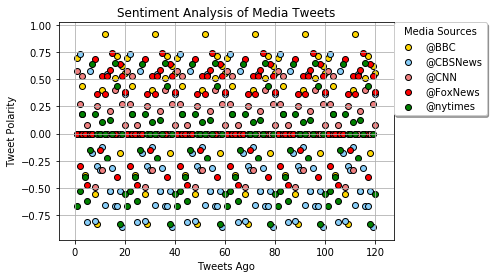

In [190]:

news_sentiments_df=pd.DataFrame.from_dict(sentiments)
#Export the data in the DataFrame into a CSV file.
news_sentiments_df.to_csv("news_tweet_sentiments_data.csv", encoding='utf-8', index=False)
groups = news_sentiments_df.groupby('Channel')
my_colors = dict({'@BBC': "Gold", '@CBSNews': "LightSkyBlue",'@CNN': "LightCoral",'@FoxNews':"red",'@nytimes':"green"})

fig, ax = plt.subplots()

for name, group in groups:
    ax.scatter(group.Tweet_Number, group.Compound, marker='o', color=my_colors[name], edgecolors='black', label=name)


ax.legend( bbox_to_anchor=(1, 1), borderaxespad=0.,title="Media Sources",loc=2,
          fancybox=True, shadow=True)
ax.grid(True)
plt.title("Sentiment Analysis of Media Tweets")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.show()

In [191]:
grouped = news_sentiments_df.groupby([ 'Channel']).agg({'Compound': pd.Series.mean})
grouped_index = grouped.reset_index()
grouped_index.head()

,Channel,Compound
0,@BBC,0.118485
1,@CBSNews,-0.219920
2,@CNN,0.090985
3,@FoxNews,0.200225
4,@nytimes,-0.083825


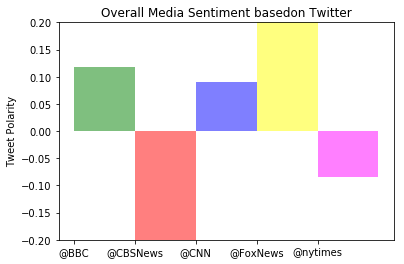

In [192]:
Channel=grouped_index["Channel"]
Compound=grouped_index["Compound"]
colors=("green","red","blue","yellow","magenta")
plt.bar(Channel,Compound, align='edge',width=1, alpha=0.5,color=colors)
plt.title("Overall Media Sentiment basedon Twitter")
plt.ylabel("Tweet Polarity")
plt.ylim([-0.20, 0.20])
plt.show()

